In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib_venn import venn3

In [3]:
figures_dir = '/Users/plutzer/majlab/figures'

In [81]:
combined_pg = pd.read_csv('/Users/plutzer/Box/CellBio-MajorLab/Users/Rotation Students/Isaac/PG files/CK1g-combined_proteinGroups.txt',delimiter = '\t')
seperate_pg = pd.read_csv('/Users/plutzer/Box/CellBio-MajorLab/Users/Rotation Students/Isaac/PG files/CK1g-seperate_proteinGroups.txt',delimiter = '\t')

C:\Users\plutzer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,6,25,30,31,32,47,48,49,51,52,53,54,55,56,57,58,59,60,61,62,63,64,83,88,89,90,106,107,109,110,111,112,113,114,115,116,117,118,119,120,121,122,141,146,147,148,164,165,167,168,169,170,171,172,173,174,175,222,223) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


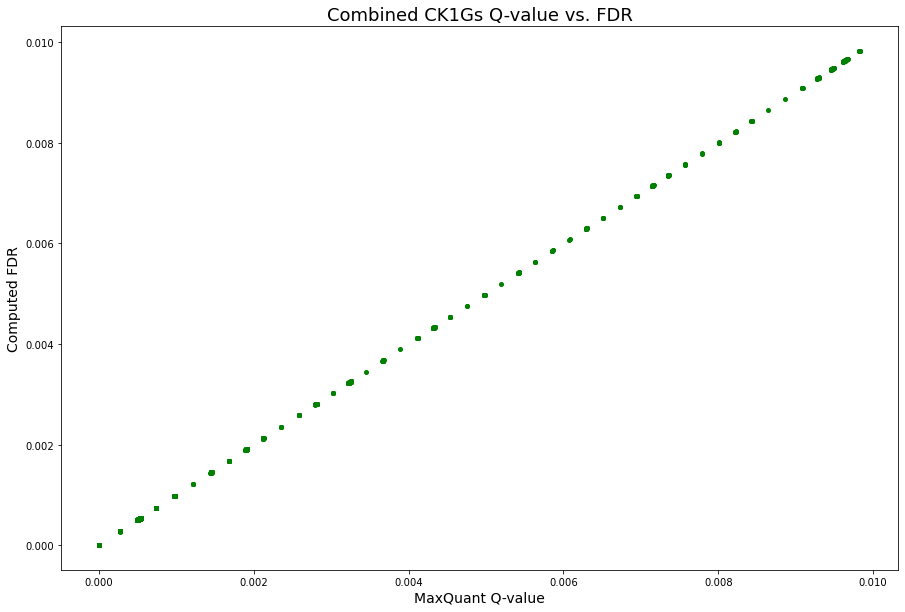

In [82]:
# First figure: correlation of q-value and FDR for combined pg
fig, ax = plt.subplots(figsize = (15,10))
plt.scatter(combined_pg['Q-value'],combined_pg['FDR'],s=16,c='green')
ax.set_title('Combined CK1Gs Q-value vs. FDR',size = 18)
ax.set_ylabel('Computed FDR',size = 14)
ax.set_xlabel('MaxQuant Q-value',size = 14)
plt.savefig(figures_dir + '/combined_CK1Gs_qvsFDR.png',dpi = 256)

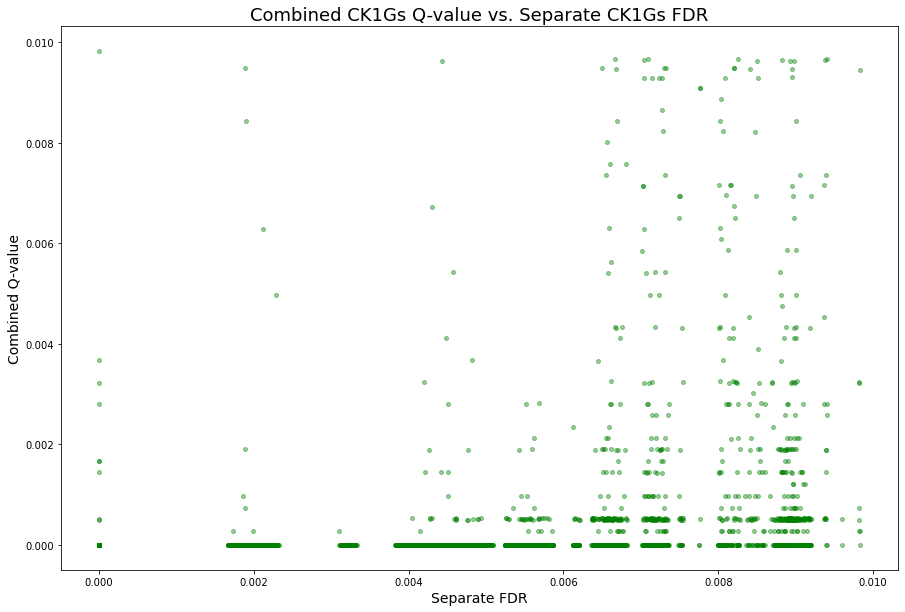

In [83]:
# Repeat with the seperated file
# NEVERMIND NOW THERE IS NO DISTINCT Q-VALUE COLUMN - CHECK AGAINST Q-VALUE FROM COMBINED
qvals = combined_pg[['Protein IDs','Q-value']].merge(seperate_pg[['Protein IDs','FDR']],how='inner',on='Protein IDs')
fig, ax = plt.subplots(figsize = (15,10))
plt.scatter(qvals['FDR'],qvals['Q-value'],s=16,c='green',alpha = 0.4)
ax.set_title('Combined CK1Gs Q-value vs. Separate CK1Gs FDR',size = 18)
ax.set_ylabel('Combined Q-value',size = 14)
ax.set_xlabel('Separate FDR',size = 14)
plt.savefig(figures_dir + '/seperate_CK1Gs_qvsFDR.png',dpi = 256)

In [84]:
#If we apply a 1% FDR cutoff, what groups stay vs. what groups go
# This should be the same with the new software, but doesn't work anymore with this code. The figures are saved.
combined = combined_pg[combined_pg['Q-value'] <= 0.01]['Protein IDs'].unique() #Change these to gene names
seperate_q = seperate_pg[seperate_pg['Q-value'] <= 0.01]['Protein IDs'].unique()
seperate_FDR = seperate_pg[seperate_pg['FDR'] <= 0.01]['Protein IDs'].unique()
all3 = len(list(set(combined).intersection(seperate_q).intersection(seperate_FDR)))
com_and_q = len(list(set(combined).intersection(seperate_q)))-all3
com_and_f = len(list(set(combined).intersection(seperate_FDR)))-all3
q_and_f = len(list(set(seperate_q).intersection(seperate_FDR)))-all3
fig, ax = plt.subplots(figsize = (15,10))
threshold_venn = venn3(subsets = (len(combined)-com_and_q-com_and_f-all3,
                        len(seperate_q)-com_and_q-q_and_f-all3,
                        com_and_q,
                        len(seperate_FDR)-com_and_f-q_and_f-all3,
                        com_and_f,
                        q_and_f,
                        all3),
                       set_labels = ('Combined Q-scores','Seperate Q-scores','Seperate FDR'))
plt.savefig(figures_dir + '/CK1Gs_FDR_threshold_venn.png')

KeyError: 'Q-value'

In [46]:
print([len(combined)-com_and_q-com_and_f-all3,
                        len(seperate_q)-com_and_q-q_and_f-all3,
                        com_and_q,
                        len(seperate_FDR)-com_and_f-q_and_f-all3,
                        com_and_f,
                        q_and_f,
                        all3])

[131, 578, 631, 2, 0, 887, 3866]


In [44]:
len(seperate_pg['Protein IDs'].unique())

5969

In [87]:
list(np.setdiff1d(combined,seperate_q))

['CON__ENSEMBL:ENSP00000377550;sp|P13646|K1C13_HUMAN;CON__P13646-1;sp|P35900|K1C20_HUMAN;CON__P35900;sp|Q9C075|K1C23_HUMAN;CON__Q9C075',
 'CON__P05787;sp|P05787|K2C8_HUMAN;CON__H-INV:HIT000016045',
 'CON__Q14525;sp|Q14525|KT33B_HUMAN;CON__Q497I4',
 'CON__Q3SX09',
 'CON__Q9QWL7',
 'REV__sp|O60664|PLIN3_HUMAN',
 'REV__sp|O95602|RPA1_HUMAN;REV__sp|O14802|RPC1_HUMAN',
 'REV__sp|P42694|HELZ_HUMAN',
 'REV__sp|Q63HN8|RN213_HUMAN',
 'REV__sp|Q8N1P7|CRBG2_HUMAN',
 'REV__sp|Q8NE71|ABCF1_HUMAN',
 'REV__sp|Q8NEZ4|KMT2C_HUMAN',
 'REV__sp|Q8NF91|SYNE1_HUMAN',
 'REV__sp|Q8WXI7|MUC16_HUMAN',
 'REV__sp|Q9H0D2|ZN541_HUMAN',
 'REV__sp|Q9P0W8|SPAT7_HUMAN',
 'REV__sp|Q9UQG0|POK11_HUMAN;REV__sp|P10266|POK10_HUMAN;REV__sp|P63135|POK7_HUMAN;REV__sp|Q9QC07|POK18_HUMAN;REV__sp|P63136|POK25_HUMAN;REV__sp|Q9BXR3|POK6_HUMAN;REV__sp|P63133|POK8_HUMAN;REV__sp|P63132|PO113_HUMAN;REV__sp|Q9WJR5|POK19_HUMAN',
 'REV__sp|Q9Y6C2|EMIL1_HUMAN',
 'sp|A6NKT7|RGPD3_HUMAN',
 'sp|A8CG34|P121C_HUMAN;sp|Q6PJE2|POZP3_HUMAN;sp|A6NF0

In [88]:
list(np.setdiff1d(seperate_FDR,combined))

['CON__ENSEMBL:ENSBTAP00000001528;sp|Q15811|ITSN1_HUMAN',
 'CON__ENSEMBL:ENSBTAP00000024146',
 'CON__ENSEMBL:ENSP00000377550;sp|P13646|K1C13_HUMAN;CON__P13646-1',
 'CON__ENSEMBL:ENSP00000377550;sp|P13646|K1C13_HUMAN;CON__P13646-1;CON__P08730-1;sp|Q99456|K1C12_HUMAN;CON__Q99456',
 'CON__ENSEMBL:ENSP00000377550;sp|P13646|K1C13_HUMAN;CON__P13646-1;sp|P35900|K1C20_HUMAN;CON__P35900;CON__Q9D312;sp|Q8N1A0|KT222_HUMAN;CON__Q8N1A0',
 'CON__P02533;sp|P02533|K1C14_HUMAN;CON__Q6IFX2',
 'CON__P02538;sp|P02538|K2C6A_HUMAN;CON__Q8VED5;sp|Q9NSB2|KRT84_HUMAN;CON__P08729;CON__Q3KNV1;sp|P08729|K2C7_HUMAN;CON__Q9NSB2;CON__Q6ISB0;CON__P19013;sp|P19013|K2C4_HUMAN;CON__Q9DCV7;CON__P07744;sp|P78386|KRT85_HUMAN;sp|P14136|GFAP_HUMAN;CON__P78386;CON__Q14533;sp|P78385|KRT83_HUMAN;CON__Q6NT21;CON__P78385;sp|O43790|KRT86_HUMAN;CON__O43790;CON__Q61726;sp|Q14533|KRT81_HUMAN',
 'CON__P02769;sp|P02768|ALBU_HUMAN;CON__P02768-1',
 'CON__P08727;sp|P08727|K1C19_HUMAN;CON__P19001',
 'CON__P08779;sp|P08779|K1C16_HUMAN;CON__

In [52]:
### What???

In [21]:
#OK moving on to the SAINT output files...
combined_SAINT = pd.read_csv('/Users/plutzer/Box/CellBio-MajorLab/Users/Rotation Students/Isaac/SAINT outputs/CK1g-combined_SAINT.csv')
seperate_SAINT = pd.read_csv('/Users/plutzer/Box/CellBio-MajorLab/Users/Rotation Students/Isaac/SAINT outputs/CK1g-separate_SAINT.csv')

In [44]:
#Look at differences in the sets of interacting proteins...
combined_interactions = combined_SAINT[combined_SAINT['SaintScore'] > 0.95]
seperate_interactions = seperate_SAINT[seperate_SAINT['SaintScore'] > 0.95]
combined_ints_list = []
for row in range(len(combined_interactions)):
    combined_ints_list.append(combined_interactions.iloc[row]['Bait'] + " + " + combined_interactions.iloc[row]['Prey'])
seperate_ints_list = []
for row in range(len(seperate_interactions)):
    seperate_ints_list.append(seperate_interactions.iloc[row]['Bait'] + " + " + seperate_interactions.iloc[row]['Prey'].split('gene_')[1])

In [53]:
# Find the set of interactions exclusive to the combined dataset
combined_only = list(np.setdiff1d(combined_ints_list,seperate_ints_list))

In [77]:
# Find the set of interactions exclusive to the seperate dataset
seperate_only = list(np.setdiff1d(seperate_ints_list,combined_ints_list))

In [70]:
completely_absent = []
for interaction in combined_only:
    if not interaction.split(' + ')[1] in ''.join(seperate_only):
        completely_absent.append(interaction)

In [71]:
print(len(completely_absent))
print(len(combined_only))

12
59


In [73]:
combined_only

['P78368 + sp|A8MVW0|F1712_HUMAN',
 'P78368 + sp|P55011|S12A2_HUMAN',
 'P78368 + sp|P78368|KC1G2_HUMAN',
 'P78368 + sp|Q8IVF2|AHNK2_HUMAN',
 'P78368 + sp|Q96RT1|ERBIN_HUMAN',
 'P78368 + sp|Q9HCM3|K1549_HUMAN',
 'P78368 + sp|Q9UPS8|ANR26_HUMAN',
 'P78368 + sp|Q9Y6M4|KC1G3_HUMAN',
 'Q9HCP0 + sp|A7KAX9|RHG32_HUMAN',
 'Q9HCP0 + sp|O00213|APBB1_HUMAN',
 'Q9HCP0 + sp|O14936|CSKP_HUMAN',
 'Q9HCP0 + sp|O94991|SLIK5_HUMAN',
 'Q9HCP0 + sp|P04626|ERBB2_HUMAN',
 'Q9HCP0 + sp|P04920|B3A2_HUMAN',
 'Q9HCP0 + sp|P19022|CADH2_HUMAN',
 'Q9HCP0 + sp|P23634|AT2B4_HUMAN',
 'Q9HCP0 + sp|P29317|EPHA2_HUMAN',
 'Q9HCP0 + sp|P35240|MERL_HUMAN',
 'Q9HCP0 + sp|P55011|S12A2_HUMAN',
 'Q9HCP0 + sp|Q01082|SPTB2_HUMAN',
 'Q9HCP0 + sp|Q09666|AHNK_HUMAN',
 'Q9HCP0 + sp|Q13136|LIPA1_HUMAN',
 'Q9HCP0 + sp|Q13177|PAK2_HUMAN',
 'Q9HCP0 + sp|Q14999|CUL7_HUMAN',
 'Q9HCP0 + sp|Q4KWH8|PLCH1_HUMAN',
 'Q9HCP0 + sp|Q5TCX8|M3K21_HUMAN',
 'Q9HCP0 + sp|Q6N022|TEN4_HUMAN',
 'Q9HCP0 + sp|Q86X10|RLGPB_HUMAN',
 'Q9HCP0 + sp|Q8NDI1|EHBP1_

In [74]:
seperate_only

['P78368 + CON__P13645;sp|P13645|K1C10_HUMAN;CON__P02535-1;+32',
 'P78368 + sp|O00213|APBB1_HUMAN;sp|Q92870|APBB2_HUMAN',
 'P78368 + sp|O00459|P85B_HUMAN',
 'P78368 + sp|O14641|DVL2_HUMAN',
 'P78368 + sp|O94887|FARP2_HUMAN',
 'P78368 + sp|O95819|M4K4_HUMAN',
 'P78368 + sp|P04264|K2C1_HUMAN;CON__P04264;CON__Q6IFZ6;+4',
 'P78368 + sp|P04350|TBB4A_HUMAN;sp|Q3ZCM7|TBB8_HUMAN;sp|A6NNZ2|TBB8L_HUMAN;+2',
 'P78368 + sp|P04626|ERBB2_HUMAN;sp|Q15303|ERBB4_HUMAN',
 'P78368 + sp|P05787|K2C8_HUMAN;CON__P05787;CON__H-INV:HIT000292931;+2',
 'P78368 + sp|P06753|TPM3_HUMAN;sp|P09493|TPM1_HUMAN;sp|P07951|TPM2_HUMAN;+1',
 'P78368 + sp|P08238|HS90B_HUMAN;sp|Q58FF7|H90B3_HUMAN;sp|Q58FF8|H90B2_HUMAN',
 'P78368 + sp|P08670|VIME_HUMAN;sp|P17661|DESM_HUMAN;sp|P41219|PERI_HUMAN;+6',
 'P78368 + sp|P11142|HSP7C_HUMAN',
 'P78368 + sp|P16403|H12_HUMAN;sp|Q02539|H11_HUMAN;sp|P22492|H1T_HUMAN;+1',
 'P78368 + sp|P18085|ARF4_HUMAN;sp|P84085|ARF5_HUMAN;sp|P84077|ARF1_HUMAN;+1',
 'P78368 + sp|P21266|GSTM3_HUMAN;sp|P46439

In [78]:
len(seperate_ints_list)-len(seperate_only)

338

In [79]:
len(seperate_ints_list)

676